In [2]:
## importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("mymoviedb.csv", lineterminator = '\n')

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [61]:
#Viewing Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [62]:
#Checking is There any Null Valule
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

• looks like our dataset has no NaNs! • Overview, Original_Language and Poster-Url
wouldn't be so useful during analysis • Release_Date column needs to be casted into
date time and to extract only the year value


In [63]:
#Exploring Genres column
df['Genre'].head()

0             Action
1          Adventure
2    Science Fiction
3              Crime
4            Mystery
Name: Genre, dtype: category
Categories (19, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'TV Movie', 'Thriller', 'War', 'Western']

• genres are saperated by commas followed by whitespaces.


In [64]:
#Checking the duplicated Values
df.duplicated().sum()

np.int64(0)

• our dataset has no duplicated rows either

In [65]:
 #Exploring Summary statistics
df.describe()

,Release_Date,Popularity,Vote_Count
count,25552.000000,25552.000000,25552.000000
mean,2005.869795,41.973711,1519.017650
std,15.486038,113.758561,2752.000974
min,1902.000000,13.354000,1.000000
25%,2000.000000,16.363000,172.000000
50%,2010.000000,21.844000,498.000000
75%,2017.000000,36.462250,1525.000000
max,2022.000000,5083.954000,31077.000000


In [ ]:
• Exploration Summary

• we have a dataframe consisting of 9827 rows and 9 columns.
• our dataset looks a bit tidy with no NaNs nor duplicated values.
• Release_Date column needs to be casted into date time and to extract only the year value
• Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
• there is noticable outliers in Popularity column
• Vote_Average bettter be categorised for proper analysis.
• Genre column has comma saperated values and white spaces that needs to be handled and casted into category.Exploration summary

In [67]:
# Data Cleaning

Casting Release_Date column and extracing year values

In [68]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Science Fiction
3,2022,The Batman,3827.658,1151,popolar,Crime
4,2022,The Batman,3827.658,1151,popolar,Mystery


In [14]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [15]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [16]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping The Columns Overview, Original_Language, Poster_URL

In [17]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [18]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**Categorizing Vote_Average column**

We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using catigorize_col() function
provided above.


In [4]:
def catigorize_col(df, col, labels):
    """
    Categorizes a certain column based on its quartiles.

    Args:
        df (DataFrame): The DataFrame to process.
        col (str): The name of the column to categorize.
        labels (list): List of category labels (from min to max).

    Returns:
        DataFrame: The modified DataFrame with the categorized column.
    """

    # Ensure column is numeric for correct statistical analysis
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop NaNs for accurate describe statistics
    desc = df[col].dropna().describe()

    # Define the edges using quartiles and min/max
    edges = [desc['min'], desc['25%'], desc['50%'], desc['75%'], desc['max']]

    # Categorize the column and store it in a new column
    df[col + '_category'] = pd.cut(df[col], bins=edges, labels=labels, include_lowest=True, duplicates='drop')

    return df

    return df

In [9]:
# define labels for edges
labels = ['not_popular','below_avg','average','popular']

# categorize column based on labels and edges
catigorize_col(df, 'Vote_Average', labels)

# confirming changes

df['Vote_Average'].unique()

array([ 8.3,  8.1,  6.3,  7.7,  7. ,  6.6,  6.8,  5.3,  7.2,  5.9,  7.3,
        7.1,  5.1,  4.6,  6. ,  8.2,  5.4,  6.1,  8.4,  6.9,  5.8,  7.4,
        7.8,  8. ,  6.2,  6.7,  7.6,  8.6,  4.8,  5.5,  7.9,  6.4,  7.5,
        5.7,  2.2,  6.5,  0. ,  5.6,  5.2,  5. ,  8.5,  3.5,  4. ,  3.3,
        4.7,  4.2,  4.3,  2. ,  4.1,  4.9,  8.7,  4.5,  9.1,  4.4,  3.6,
        2.8,  3.9,  3.8,  9. ,  3. ,  3.1,  3.7,  3.4,  8.9,  2.9,  8.8,
        3.2,  1.5,  9.2,  2.5,  1.8,  2.4,  2.6, 10. ])

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Vote_Average_category
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,popular
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,popular
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,below_avg
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,popular
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,average


In [36]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popolar        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [41]:
df.dropna(inplace = True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [42]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popolar,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popolar,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popolar,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


# we'd split genres into a list and then explode our dataframe to have only one genre per row for ezch movie

In [43]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Science Fiction
3,2022,The Batman,3827.658,1151,popolar,Crime
4,2022,The Batman,3827.658,1151,popolar,Mystery


In [44]:
#Casting Column into Categroy

df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [46]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [47]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Science Fiction
3,2022,The Batman,3827.658,1151,popolar,Crime
4,2022,The Batman,3827.658,1151,popolar,Mystery


# Data Visualization

In [3]:
sns.set_style("whitegrid")

# Q1: What is the most frequent genre of movies released on Netflix ?

In [49]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

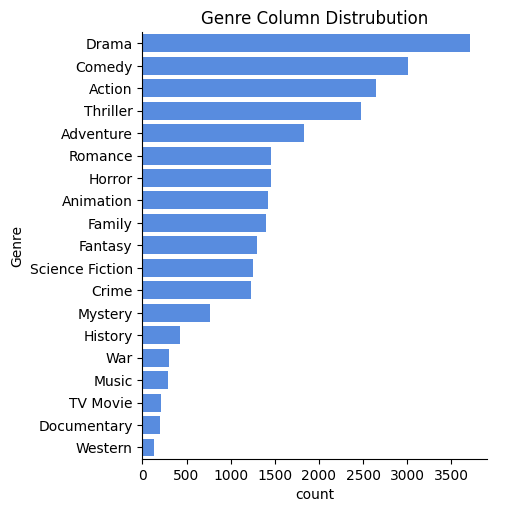

In [50]:
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().index,
            color = '#4287f5')

plt.title("Genre Column Distrubution")
plt.show()

In [ ]:
we can notice from the above visual that Drama genre is the most frequent genre
in our dataset and has appeared more than 14% of the times among 19 other
genres.


## Q2: Which has highest votes in vote avg column?

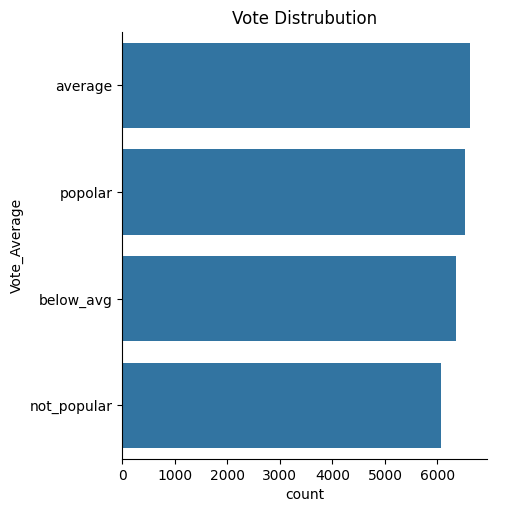

In [52]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index)

plt.title("Vote Distrubution")

plt.show()

What Movie Got The Highest Popularity? Whats its Genre?

In [53]:
df.head(2)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Adventure


In [58]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popolar,Science Fiction


# Q4 : What Movie Got The Lowest Popularity? Whats its Genre?

In [59]:
# checking min popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popolar,War
25550,1984,Threads,13.354,186,popolar,Drama
25551,1984,Threads,13.354,186,popolar,Science Fiction


# Q5 : Which Year Has The Most Filmmed Movies ?

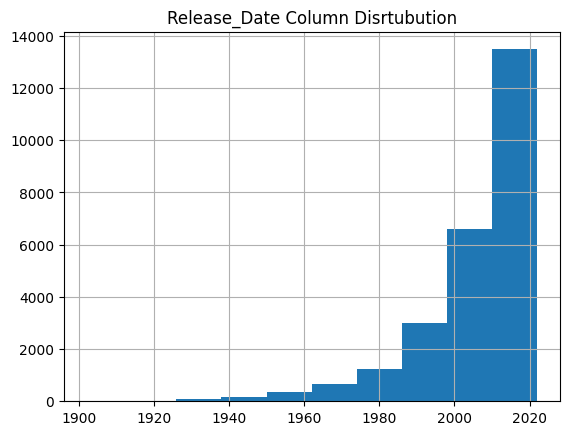

In [57]:
df['Release_Date'].hist()
plt.title("Release_Date Column Disrtubution")
plt.show()

### Conclusion

Q1: What is the most frequent genre in the dataset?

Ans. Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.


Q2: What genres has highest votes ?

Ans. We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.


Q3: What movie got the highest popularity ? what's its genre ?

Ans. Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .


Q4: What movie got the lowest popularity ? what's its genre ?

Ans. The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.


Q5: Which year has the most filmmed movies?

Ans. Year 2020 has the highest filmming rate in our dataset.

In [ ]:
s